<a href="https://colab.research.google.com/github/DomMc97/Citation-Graph-Clustering/blob/main/Citations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis and Unsupervised Clustering of Citation Graph

An analysis and an unsupervised clustering of a graph of citations between journal papers. The citations define an undirected graph which is encoded through its $N \times N$ adjacency matrix, A.

The anaylsis includes the finding of degree, betweenness, and Pagerank centralities.

---

## Set Up

In [2]:
# scientific library
import numpy as np

# used to find counts
from collections import Counter

# data analytics library
import pandas as pd

# sklearn functions
from sklearn.cluster import KMeans
from sklearn import metrics

# networkx
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

# plotting libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns
sns.set() #sets design of figures

# libraries for saving/loading data
import pickle
from google.colab import drive

Mount Google Drive.

In [3]:
# mount drive
drive.mount('/content/drive')

# root of all file paths used in notebook
root = '/content/drive/My Drive/Methods for Data Science/CW3/Data/'

Mounted at /content/drive


Asks user whether this is the first run of the code to avoid repeat computations.

In [4]:
# code reapeats until a valid input is inserted for the question.
while True:
    init_run = input('Is this the first run of the code y/n?\n')

    if init_run == 'y':
        init_run = True
        break
    elif init_run == 'n':
        init_run = False
        break
    else:
        print('Invalid input.\n')

Is this the first run of the code y/n?
n


Importation of the feature matrix and adjacency matrix.

In [5]:
# upload files
# feature matrix
F = pd.read_csv(root + 'feature_matrix.csv', header=None)
# adjacency matrix
A = pd.read_csv(root + 'adjacency_matrix.csv', header=None)

# conversion of A into a graph
A = nx.from_pandas_adjacency(A)

## Visualisation of the Citation Graph

Visualisation using NetworkX of the citation graph described by the adjacency matrix, A.

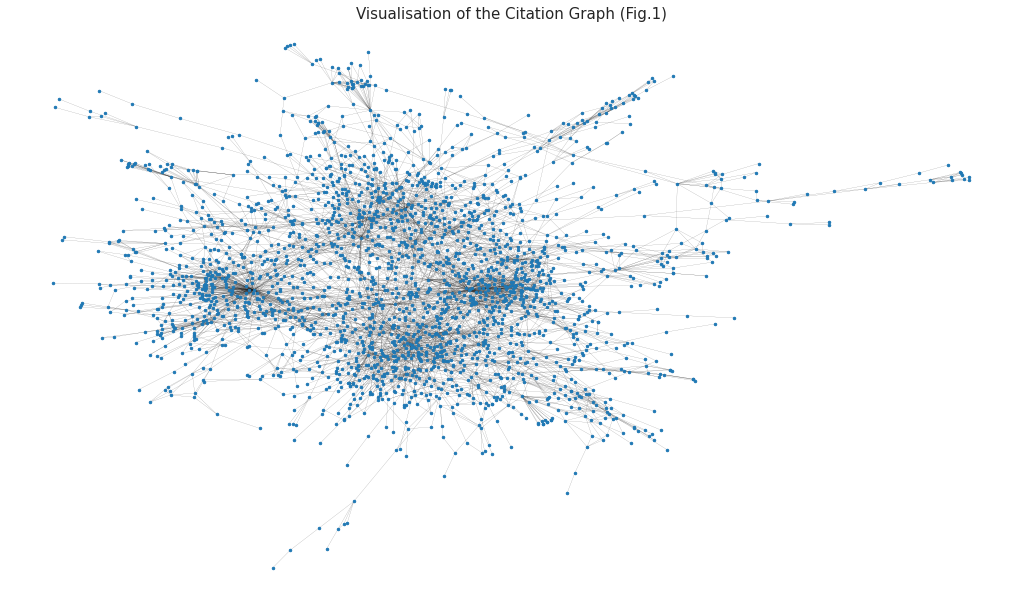

In [6]:
# creates figure
fig = plt.figure(figsize=(14,8))

# titles
fig.suptitle('Visualisation of the Citation Graph (Fig.1)', fontsize='15',
             y=1.02)

# if initial run save layout
if init_run:
    # layout
    pos = nx.spring_layout(A)
    
    # save layout
    with open(root + 'pos.sav', 'wb') as fp:
        pickle.dump(pos, fp)

# else load layout 
else:
    # load layout
    pos = pickle.load(open(root + 'pos.sav', 'rb'))

# draws graphs
nx.draw(A,pos=pos, node_size=6, width=0.1)

plt.show()

Plot the degree distribution of the graph A as a histogram.

**Degree:** The degree of the vertex $v \in V$ is the number of edges $e \in E$ that are incident to the vertex $v$.

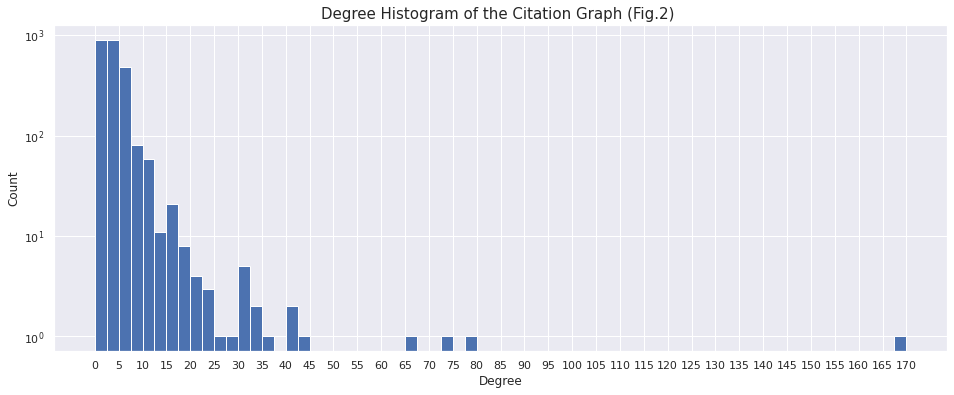

In [7]:
# data to plot in histogram
 # sorted degree sequence
degree_sequence = sorted([d for n, d in A.degree()], reverse=True) 

#creates figure
fig = plt.figure(figsize=(16,6))

# sets titles
plt.title('Degree Histogram of the Citation Graph (Fig.2) ', fontsize='15')
plt.xlabel('Degree')
plt.ylabel('Count')

# plots histogram
plt.hist(degree_sequence,range=[0, 170], bins=68)
plt.yscale('log')

x_ticks = np.arange(0, 171, 5)
plt.xticks(x_ticks)

plt.show()

## Centralities
A computation of a variety of centrality measures for all the vertices of the graph.

**Centrality measure:**

A centrality measure is a measure which ranks the vertices/edges in order of importance.



---

A set of functions to visulaises the centralities.


In [8]:
def centrality(C):
    """ A function which summarises the results of a centrality, C
    Input: Results of a nx centrality ranking."""
    # 10 most important vertices
    cen = sorted(C, key=C.get, reverse=True)[:10]

    # least important
    least = min(C, key=C.get)
    rank = 1
    for v in cen:
            val = float(C[v])
            print('Rank {}: \t Vertex: {}  \t Centrality Value:{:5f}\n'.format(
                rank, v, val))
            rank += 1

    print('...\n')

    rank = len(C)
    val = float(C[least])
    print('Rank {}: \t Vertex: {}  \t Centrality Value:{:5f}\n'.format(
        rank, least, val))

def draw_centrality(G, C, fig_name):
    """ A function which visulaises the results of a centrality C of a graph G.
    Input:
        C: Results of a nx centrality ranking.
        G: nx graph of a centrality.
        fig_name: string of a figure name.
    """
    # creates figure
    fig = plt.figure(figsize=(20,10))
    
    # vertices assigned a colour
    nodes = nx.draw_networkx_nodes(
        G,
        pos, 
        node_size=6,
        cmap=plt.cm.plasma, 
        node_color=list(C.values()))
        
    nodes.set_norm(mcolors.SymLogNorm(base=10, linthresh=0.01, linscale=1))
    
    # draws edges
    edges = nx.draw_networkx_edges(G, pos, width=0.1)

    # sets title
    plt.title(fig_name, fontsize='15')

    # draws centrality
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

### Degree Centrality

Computation of the degree centrality.

**Degree centrality:**

The Degree centrality ranks the vertices $v \in V$ in order of $deg(v)$ with the highest degree being the most important. $\vec{C_{d}} = \frac{\vec{d}}{|V|-1}$

##########################
Degree Centrality rankings
##########################

Rank 1: 	 Vertex: 1245  	 Centrality Value:0.067633

Rank 2: 	 Vertex: 271  	 Centrality Value:0.031401

Rank 3: 	 Vertex: 1563  	 Centrality Value:0.029791

Rank 4: 	 Vertex: 1846  	 Centrality Value:0.026167

Rank 5: 	 Vertex: 1672  	 Centrality Value:0.017713

Rank 6: 	 Vertex: 1491  	 Centrality Value:0.016908

Rank 7: 	 Vertex: 1894  	 Centrality Value:0.016103

Rank 8: 	 Vertex: 78  	 Centrality Value:0.014493

Rank 9: 	 Vertex: 926  	 Centrality Value:0.013688

Rank 10: 	 Vertex: 542  	 Centrality Value:0.013285

...

Rank 2485: 	 Vertex: 16  	 Centrality Value:0.000403



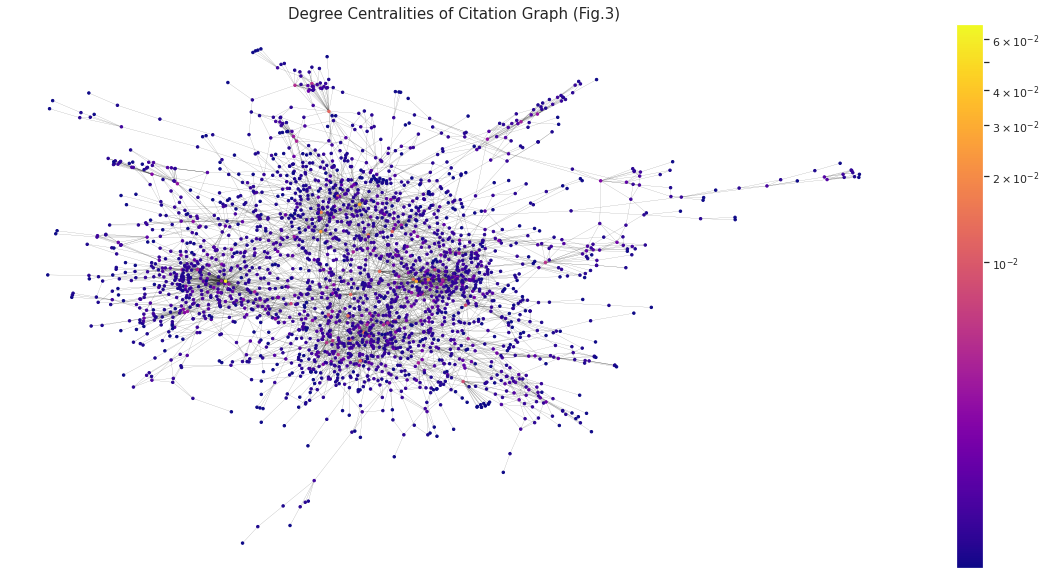

In [9]:
# Computes the degree centrality for vertices.
C_d = nx.degree_centrality(A)

# prints results
print('##########################')
print('Degree Centrality rankings')
print('##########################\n')
centrality(C_d)

# draws centrality
draw_centrality(A, C_d, 'Degree Centralities of Citation Graph (Fig.3)')

### Betweenness Centrality

Computation the betweenness centrality.

**Betweenness centrality:**

The betweenness centrality measure is a measure based on shortest paths. 

For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that the number of edges that the path passes through is minimised.

The betweenness centrality for each vertex is the number of these shortest paths for the graph that pass through the given vertex.

**Path:**
 A path in a Graph $G = (V,E)$ is a sequence $(v_{1},e_{1},v_{2}, ...,e_{n-1}, v_{n})$ where $v_{1},...,v_{n} \in V$ and for $ 1 \leq i \leq n-1$ $e_{i}$ is an edge $v_{i}$ to $v_{i+1}$ there are no repeat vertices in the sequence.

In our case $n-1$ is the length of the path.

**Connected:**

The graph G is connected if for every pair of vertices $u,v \in V$ there is a path $u$ to $v$.

###############################
Betweenness Centrality rankings
###############################

Rank 1: 	 Vertex: 1245  	 Centrality Value:0.276114

Rank 2: 	 Vertex: 1846  	 Centrality Value:0.149763

Rank 3: 	 Vertex: 1894  	 Centrality Value:0.106109

Rank 4: 	 Vertex: 1563  	 Centrality Value:0.101355

Rank 5: 	 Vertex: 271  	 Centrality Value:0.090707

Rank 6: 	 Vertex: 977  	 Centrality Value:0.080662

Rank 7: 	 Vertex: 926  	 Centrality Value:0.075044

Rank 8: 	 Vertex: 1672  	 Centrality Value:0.062338

Rank 9: 	 Vertex: 78  	 Centrality Value:0.059195

Rank 10: 	 Vertex: 95  	 Centrality Value:0.048991

...

Rank 2485: 	 Vertex: 7  	 Centrality Value:0.000000



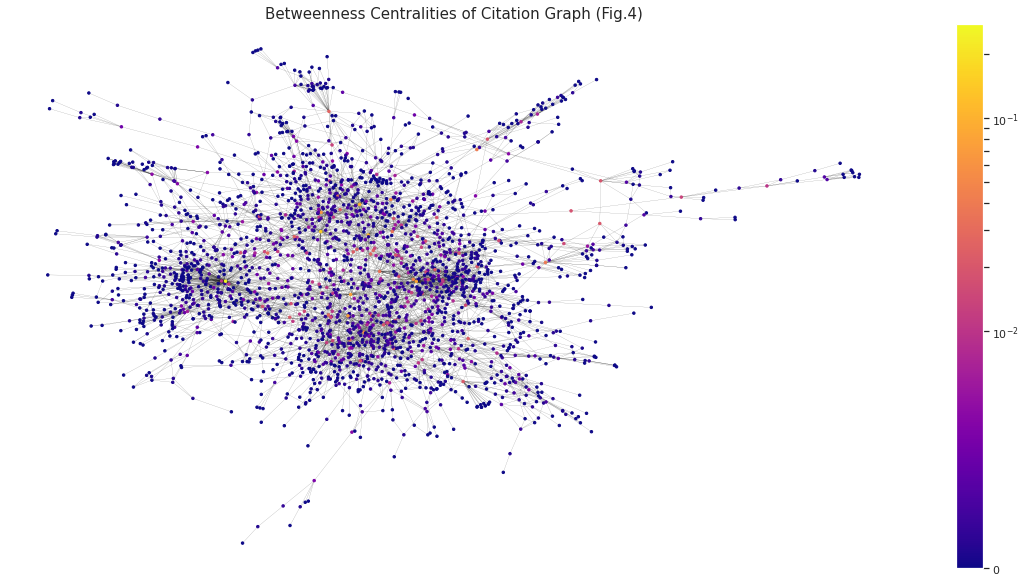

In [10]:
# Computes the betweneness centrality for vertices.
C_b = nx.betweenness_centrality(A)

# prints results
print('###############################')
print('Betweenness Centrality rankings')
print('###############################\n')
centrality(C_b)

# draws centrality
draw_centrality(A, C_b, 'Betweenness Centralities of Citation Graph (Fig.4)')

### Page Rank Centrality

Calculation of the Page rank centrality.

**Page rank:** 

We consider a random walk in the graph which can be written in the following form.

$ \vec{C_{PR}}_{t+1} = \alpha(AD^{-1})\vec{C_{PR}}_{t} + (1-\alpha)\frac{\vec{1}}{|V|}$ where, $\alpha = 0.85$.

The first term describes a random walk along the edges and the 2nd term describes a jump to a random vertex. The probablity for a walker to be at a given node at the stationarity distribution of this random walk.

#############################
Page Rank Centrality rankings
#############################

Rank 1: 	 Vertex: 1245  	 Centrality Value:0.013302

Rank 2: 	 Vertex: 1563  	 Centrality Value:0.006811

Rank 3: 	 Vertex: 1846  	 Centrality Value:0.005833

Rank 4: 	 Vertex: 271  	 Centrality Value:0.005511

Rank 5: 	 Vertex: 1672  	 Centrality Value:0.003957

Rank 6: 	 Vertex: 1894  	 Centrality Value:0.003471

Rank 7: 	 Vertex: 1491  	 Centrality Value:0.003043

Rank 8: 	 Vertex: 78  	 Centrality Value:0.002917

Rank 9: 	 Vertex: 542  	 Centrality Value:0.002875

Rank 10: 	 Vertex: 926  	 Centrality Value:0.002759

...

Rank 2485: 	 Vertex: 2058  	 Centrality Value:0.000119



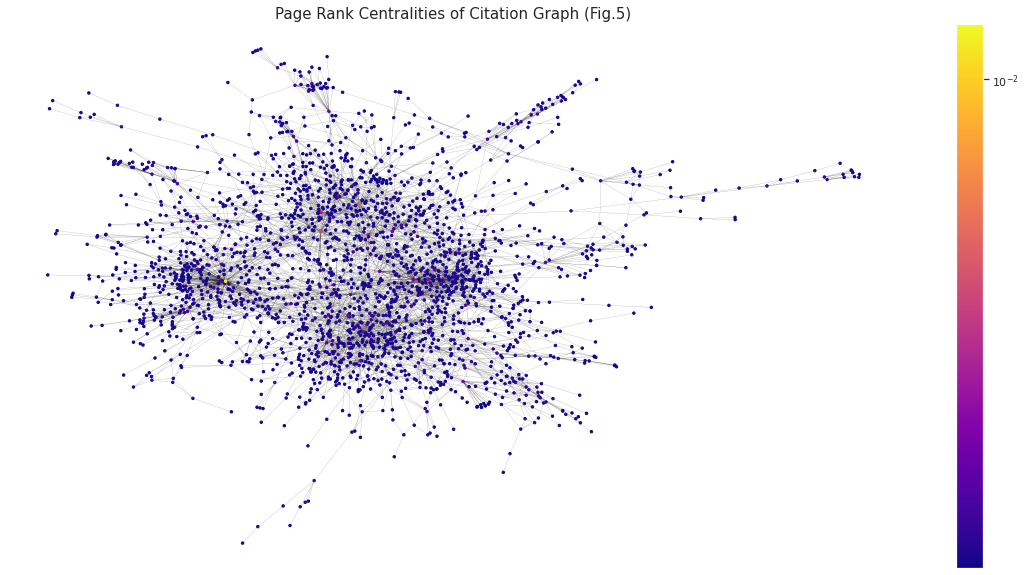

In [11]:
# Computes the betweneness centrality for vertices.
C_PR = nx.pagerank(A)

# prints results
print('#############################')
print('Page Rank Centrality rankings')
print('#############################\n')
centrality(C_PR)

# draws centrality
draw_centrality(A, C_PR, 'Page Rank Centralities of Citation Graph (Fig.5)')

### Comparison of Centralities

Now using correlation plots I'll discuss the similarity between the vertex rankings according to the different centrality measures. 

In [12]:
"""prepares data"""
# values of rankings
deg_vals = list(C_d.values())
b_vals = list(C_b.values())
pr_vals = list(C_PR.values())

# dictonary of centrality scores
cent_dict = {'Degree':deg_vals, 'Betweenness':b_vals, 'Page Rank':pr_vals}

# creates dataframe
cent_df = pd.DataFrame(data=cent_dict)

Plot of the scatter plots to compare the centrality measures.

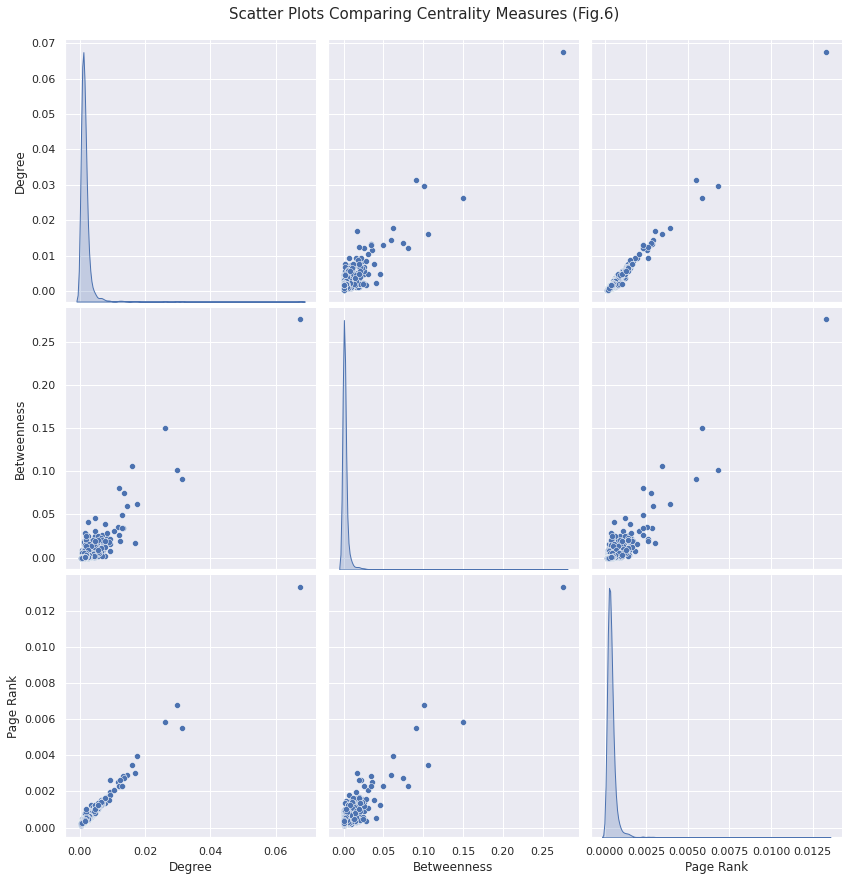

In [13]:
# scatter plots
g = sns.pairplot(cent_df,diag_kind='kde',height=4)
g.fig.suptitle('Scatter Plots Comparing Centrality Measures (Fig.6)', y=1.02,
               fontsize=15)
plt.show()

The correlation coefficients.

In [14]:
# corr coefs
a = np.corrcoef(deg_vals, b_vals)[0][1]
b = np.corrcoef(deg_vals, pr_vals)[0][1]
c = np.corrcoef(b_vals, pr_vals)[0][1]

# prints results
print('######################')
print('Correlation coeffients')
print('######################\n')
print('The correlation between Degree and Betweenness Centrality is %.5f.\n'%a)
print('The correlation between Degree and Pagerank Centrality is %.5f.\n'%b)
print('The correlation between Betweenness and Pagerank Centrality is %.5f.\n'%c)

######################
Correlation coeffients
######################

The correlation between Degree and Betweenness Centrality is 0.87693.

The correlation between Degree and Pagerank Centrality is 0.98843.

The correlation between Betweenness and Pagerank Centrality is 0.88479.



From (Fig.6) and the strongly positive correlation values,we can see all 3 rankings are highlhy similar. Futhermore we can notice that the Rank 1 vertex is vertex 1245 for all the rankings and the verticies 271, 1563, 1846 appear in all centralities top 5 ranked verticies.  

As discussed before the Degree centrality ranks the vertices $v \in V$ in order of $deg(v)$ with the highest degree being the most important. Why is this ranking similar to betweenness and pagerank?

**Degree vs Betweenness:**

The betweenness centrality for each vertex is the number of shortest paths for the graph that pass through the given vertex. If a vertex has a high degree it will have lot more edges 'into' it therefore it will have a lot more possible paths through it, so it is therefore more than likely to have more shortest paths through it. So a high degree ranking will be correlated to a high betweenness rank.

**Degree vs Page Rank:**

The page rank centrality arises from a stochastic proccess which 'traverses' the graph. Depending on what vertex your at you can describe the next vertex as random variable with a probability measure assigned to it. If a vertex has a high degree it will likely have higher probability of being traversed too as there are a lot more ways to move to it. So a high degree node has a higher chance to have a high rank in the pagerank centrality.

**Betweenness vs Page Rank:**

This correlation follows directly from above.

## Unsupervised Clustering of the Citation Graph

I will use the Clauset-Newman-Moore greedy modularity maximisation algorithm in Networkx to compute the optimal number of communities $k^{*}$ and the corresponding partition of the citation graph. 

**Clauset-Newman-Moore greedy modularity maximisation algorithm:**

The CNM algorithm is a heuristic method aiming at the fast identification of communities, suited for large scale networks.

I will leave a link to the paper [Finding community structure in very large networks
](https://http://ece-research.unm.edu/ifis/papers/community-moore.pdf) which describes how the algorithm works.



---

Finding of the modularity maximised clusters.


In [15]:
# if first run find and save clusters
if init_run:
    # runs CNM algorithm on citation graph to find clustering
    cnm_cluster = list(greedy_modularity_communities(A))

    # save results
    with open(root + 'cnm_labels.sav', 'wb') as fp:
        pickle.dump(cnm_cluster, fp)

# else load clusters
else:
    cnm_cluster = pickle.load(open(root + 'cnm_labels.sav', 'rb'))


# k*
k_star = str(len(cnm_cluster))

# prints results
print('#############################')
print('Optimal number of communities')
print('#############################\n')
print('The optimal number of communities is ' + k_star + '.')

#############################
Optimal number of communities
#############################

The optimal number of communities is 29.


### Visualisations of Clustering of Citation Graph

A plot of the modularity maximised cluster on the citation graph.

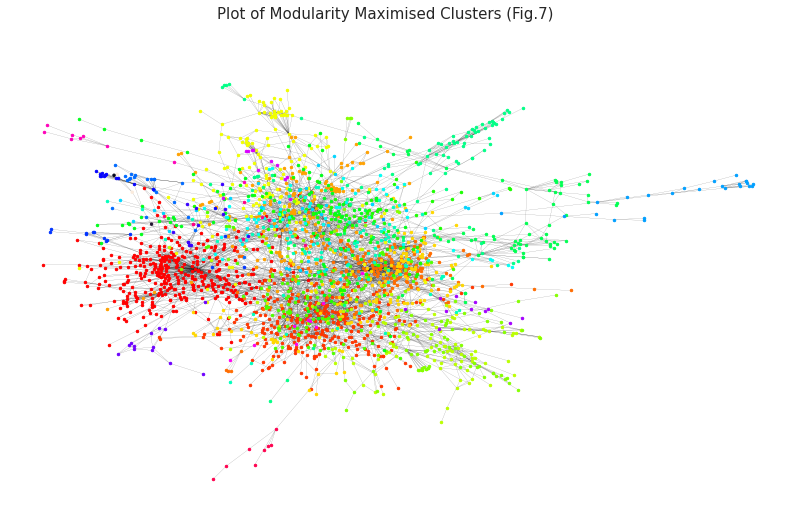

In [16]:
# creates figure
fig = plt.figure(figsize=(14,8))

# sets title 
fig.suptitle('Plot of Modularity Maximised Clusters (Fig.7)',fontsize=15)

# draws graph without colours
nx.draw_networkx_edges(A, pos, width=0.1)

# creates colour map of size k*
cmap = plt.cm.get_cmap('hsv', k_star)

# sets node colours
for i, com in enumerate(cnm_cluster):
  color = cmap(i)
  nx.draw_networkx_nodes(A, pos,node_size=6, nodelist=com, node_color=color)

plt.axis('off')
plt.show()

# Centarlities  Distribution Across Clusters

I'll now study how the top 30 most central nodes according to degree and Pagerank are distributed
across the $k^{*}$ communities. 

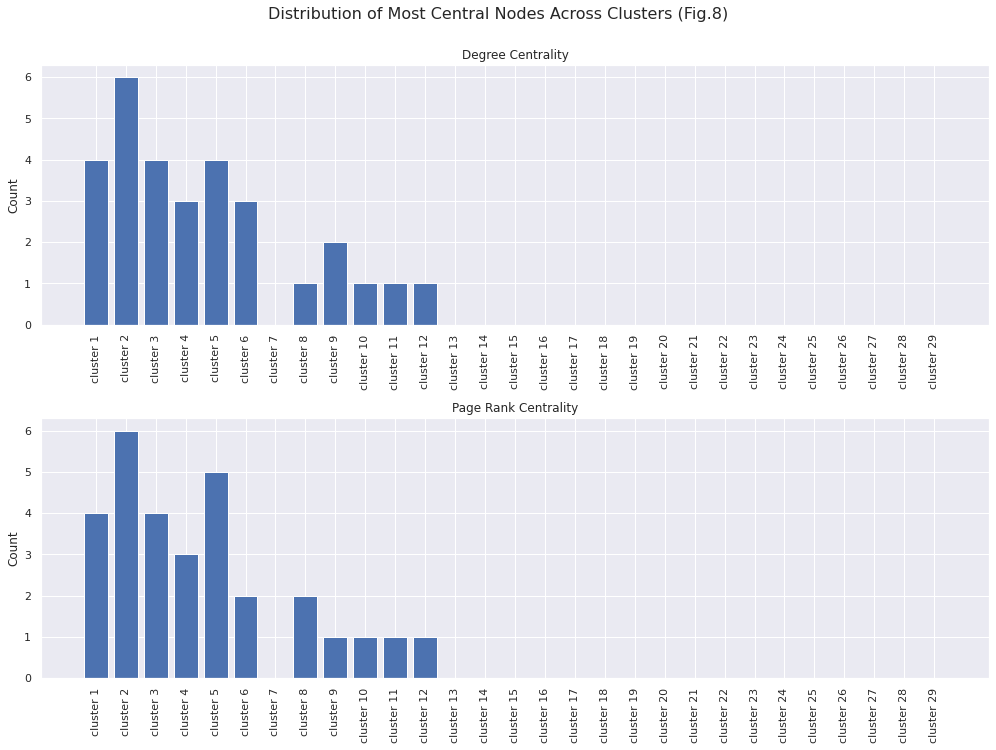

In [17]:
# top 30 nodes
top_d = sorted(C_d, key=C_d.get, reverse=True)[:30]
top_PR = sorted(C_PR, key=C_PR.get, reverse=True)[:30]

# dictonary of clustering
cnm_cluster_dict = {}
for i, clust in enumerate(cnm_cluster):
  label = 'cluster ' + str(i + 1)
  cnm_cluster_dict[label] = clust

# dictonary keys
keys = cnm_cluster_dict.keys()

# distribution of top 30 most central nodes according to degree
# initial dict
d_dist = dict.fromkeys(keys, 0)
for node in top_d:
    for key in keys:
        if node in cnm_cluster_dict[key]:
            d_dist[key] +=1

# distribution of top 30 most central nodes according to pagerank
# initial dict
PR_dist = dict.fromkeys(keys, 0)
for node in top_PR:
    for key in keys:
        if node in cnm_cluster_dict[key]:
            PR_dist[key] +=1

# creates figure
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# sets titles
plt.suptitle('Distribution of Most Central Nodes Across Clusters (Fig.8)',
             y=1.04, fontsize=16)
ax1.set_title('Degree Centrality')
ax1.set_xticks(range(len(d_dist)))
ax1.set_xticklabels(list(d_dist.keys()), rotation=90)
ax1.set_ylabel('Count')
ax2.set_title('Page Rank Centrality')
ax2.set_xticks(range(len(PR_dist)))
ax2.set_xticklabels(list(PR_dist.keys()), rotation=90)
ax2.set_ylabel('Count')

# plots bar charts
ax1.bar(range(len(d_dist)), list(d_dist.values()), align='center')
ax2.bar(range(len(PR_dist)), list(PR_dist.values()), align='center')

plt.tight_layout()
plt.show()

We can see from (Fig.8) that the distribution for both Degree and PageRank across the $k^{*}$ clusters is almost identical with the only difference being that cluster 5 and 8 have 1 higher count for PageRank than Degree and cluster 6 and 9 have 1 lower for PageRank compared to Degree. 

The reasons why the distributions are similar is due to the general correlation between the Page Rank and Degree centralities discussed above.

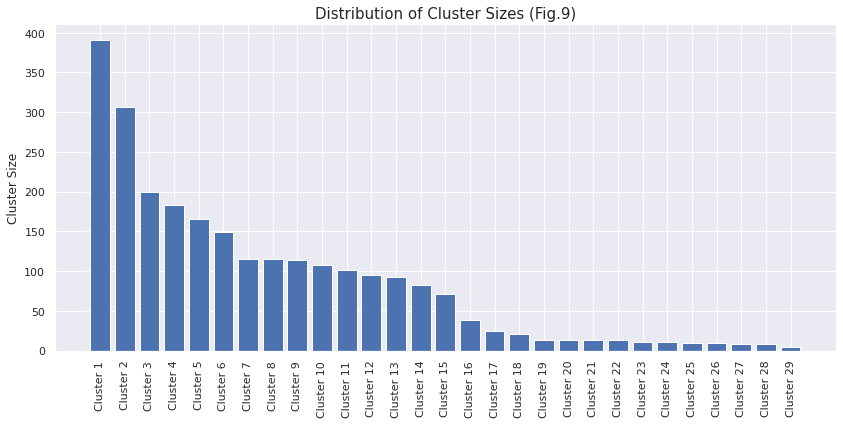

In [19]:
# dictonary of cluster sizes
size_dict = {}
for i, clust in enumerate(cnm_cluster):
      label = 'Cluster ' + str(i + 1)
      size_dict[label] = len(clust)

# creates figure
fig = plt.figure(figsize=(14,6))

# sets titles
plt.title('Distribution of Cluster Sizes (Fig.9)', fontsize=15)
plt.xticks(range(len(size_dict)), list(size_dict.keys()), rotation=90)
plt.ylabel('Cluster Size')

# plots bar charts
plt.bar(range(len(size_dict)), list(size_dict.values()), align='center')

plt.show()

Comparing (Fig.8) and (Fig.9) we can see that in general the larger clusters are more likely to contain a highly central node.

This is due to the fact that if a node has a high degree it will be highly central and will act as a 'centroid' of a cluster, with the majority of the nodes it's directly connected to being in that cluster.

Thus the large clusters are more than likely to contain a high degree node.A cluster having more nodes also clearly increases it's likelyhood of containing a given node and hence a central node.